Accuracy: 0.95
              precision    recall  f1-score   support

 No Rockfall       0.96      0.98      0.97       204
    Rockfall       0.86      0.80      0.83        40

    accuracy                           0.95       244
   macro avg       0.91      0.89      0.90       244
weighted avg       0.95      0.95      0.95       244

Rockfall risk (1=Yes, 0=No): 0


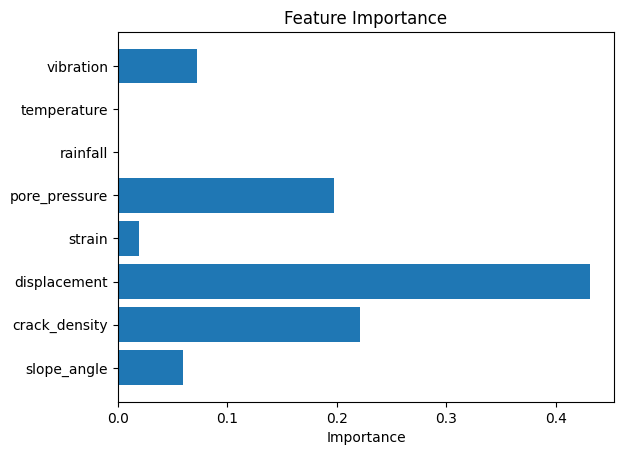

In [13]:
# Rockfall Prediction Model (Simple & Interpretable)
# Predicts rockfall risk in open pit mines using sensor data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Load the data
file_path = 'synthetic_rockfall_dataset (1).csv'
data = pd.read_csv(file_path)

# 2. Features and target
features = [
    'slope_angle', 'crack_density', 'displacement', 'strain',
    'pore_pressure', 'rainfall', 'temperature', 'vibration'
]
X = data[features]
# Convert risk to binary: 1 = high risk (rockfall), 0 = low risk
# You can adjust the threshold as needed
threshold = 0.5
y = (data['risk'] > threshold).astype(int)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Decision Tree model
model = DecisionTreeClassifier(random_state=42, max_depth=3)  # max_depth for simplicity
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No Rockfall', 'Rockfall']))

# 6. Example: Predict on new data
example = pd.DataFrame({
    'slope_angle': [45],
    'crack_density': [0.2],
    'displacement': [3],
    'strain': [0.007],
    'pore_pressure': [60],
    'rainfall': [40],
    'temperature': [22],
    'vibration': [0.4]
})
prediction = model.predict(example)
print('Rockfall risk (1=Yes, 0=No):', prediction[0])

# 7. (Optional) Show feature importance
plt.barh(features, model.feature_importances_)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [14]:
# Test the model on a separate test dataset and print probability (%)
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Load the test dataset
file_path_test = 'rockfall_test_dataset.csv'
test_data = pd.read_csv(file_path_test)

# Prepare features and binary target for test set
X_test_external = test_data[features]
y_test_external = (test_data['risk'] > threshold).astype(int)

# Predict probabilities on the test set
external_pred_proba = model.predict_proba(X_test_external)[:, 1]  # Probability of rockfall
external_pred_percent = (external_pred_proba * 100).round(2)

# Print probability predictions only (as percentage)
print('Predicted probability of rockfall for each test sample:')
for i, prob in enumerate(external_pred_percent, 1):
    print(f"Sample {i}: {float(prob):.2f}%")

# (Optional) Print accuracy if thresholded at 0.5
external_pred = (external_pred_proba > 0.5).astype(int)
external_accuracy = accuracy_score(y_test_external, external_pred)
print(f'External Test Accuracy: {external_accuracy:.2f}')

Predicted probability of rockfall for each test sample:
Sample 1: 40.00%
Sample 2: 40.00%
Sample 3: 0.00%
Sample 4: 7.69%
Sample 5: 40.00%
Sample 6: 0.30%
Sample 7: 40.00%
Sample 8: 40.00%
Sample 9: 40.00%
Sample 10: 7.69%
Sample 11: 0.00%
Sample 12: 40.00%
Sample 13: 86.67%
Sample 14: 0.30%
Sample 15: 0.30%
Sample 16: 0.30%
Sample 17: 40.00%
Sample 18: 40.00%
Sample 19: 0.30%
Sample 20: 0.00%
Sample 21: 0.30%
Sample 22: 0.30%
Sample 23: 0.30%
Sample 24: 40.00%
Sample 25: 40.00%
Sample 26: 40.00%
Sample 27: 0.30%
Sample 28: 0.30%
Sample 29: 7.69%
Sample 30: 0.30%
Sample 31: 0.30%
Sample 32: 40.00%
Sample 33: 83.05%
Sample 34: 83.05%
Sample 35: 40.00%
Sample 36: 0.30%
Sample 37: 40.00%
Sample 38: 40.00%
Sample 39: 0.00%
Sample 40: 0.30%
Sample 41: 0.30%
Sample 42: 40.00%
Sample 43: 40.00%
Sample 44: 40.00%
Sample 45: 40.00%
Sample 46: 40.00%
Sample 47: 0.30%
Sample 48: 21.43%
Sample 49: 0.30%
Sample 50: 0.30%
Sample 51: 40.00%
Sample 52: 0.30%
Sample 53: 40.00%
Sample 54: 0.30%
Sample 5